# Business Understanding



In [1]:
'''
Tujuan = Membantu Mr. Cho untuk memprediksi harga rumah di Bengaluru dalam menentukan harga jual rumah
Permasalahan = Mr. Cho ingin menjual rumah, namun masih belum mengetahui harga jualnya.
               Sehingga Mr. Cho perlu memprediksi harga rumah di Bengaluru untuk membantunya
               membuat keputusan yang lebih tepat dalam menentukan harga
Kebutuhan = Bengaluru_House_Data.csv
'''

'\nTujuan = Membantu Mr. Cho untuk memprediksi harga rumah di Bengaluru dalam menentukan harga jual rumah\nPermasalahan = Mr. Cho ingin menjual rumah, namun masih belum mengetahui harga jualnya.\n               Sehingga Mr. Cho perlu memprediksi harga rumah di Bengaluru untuk membantunya\n               membuat keputusan yang lebih tepat dalam menentukan harga\nKebutuhan = Bengaluru_House_Data.csv\n'

# Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE

In [3]:
#Load Dataset
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


###**DATA DESCRIPTION**

**📌 Area_type - Description of the area**

**📌 Availability - When it can be possessed or when it is ready**

**📌 Location - Where it is located in Bengaluru**

**📌 Size - BHK or Bedrooms**

**📌 Society - To which society it belongs**

**📌 Total_sqft - Size of the property in sq.ft**

**📌 Bath - No. of Bathrooms**

**📌 Balcony - No. of the Balcony**

**📌 Price - Value of the property in lakhs (Indian Rupee - ₹)**

## Dataset

In [4]:
#Melihat info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#Deskripsi stastistik Dataset (Numerik)
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
#Membuat variable baru dengan tipe data numerik
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00


In [7]:
#Membuat variable baru dengan tipe data kategorikal
cat_df = df.drop(num_df, axis = 1)
cat_df.head()

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200


In [8]:
#Mengecek informasi tentang struktur DataFrame
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [9]:
#Menampilkan hasil eksplorasi
hasil_eksplorasi = check_values(df)
hasil_eksplorasi

,kolom,dataType,null,nullPercentage,unique,values
0,area_type,object,0,0.00,4,"[Super built-up Area, Plot Area, Built-up A..."
1,availability,object,0,0.00,81,"[19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov..."
2,location,object,1,0.01,1305,"[Electronic City Phase II, Chikka Tirupathi, U..."
3,size,object,16,0.12,31,"[2 BHK, 4 Bedroom, 3 BHK, 4 BHK, 6 Bedroom, 3 ..."
4,society,object,5502,41.31,2688,"[Coomee , Theanmp, nan, Soiewre, DuenaTa, Jaad..."
5,total_sqft,object,0,0.00,2117,"[1056, 2600, 1440, 1521, 1200, 1170, 2732, 330..."
6,bath,float64,73,0.55,19,"[2.0, 5.0, 3.0, 4.0, 6.0, 1.0, 9.0, nan, 8.0, ..."
7,balcony,float64,609,4.57,4,"[1.0, 3.0, nan, 2.0, 0.0]"
8,price,float64,0,0.00,1994,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ..."


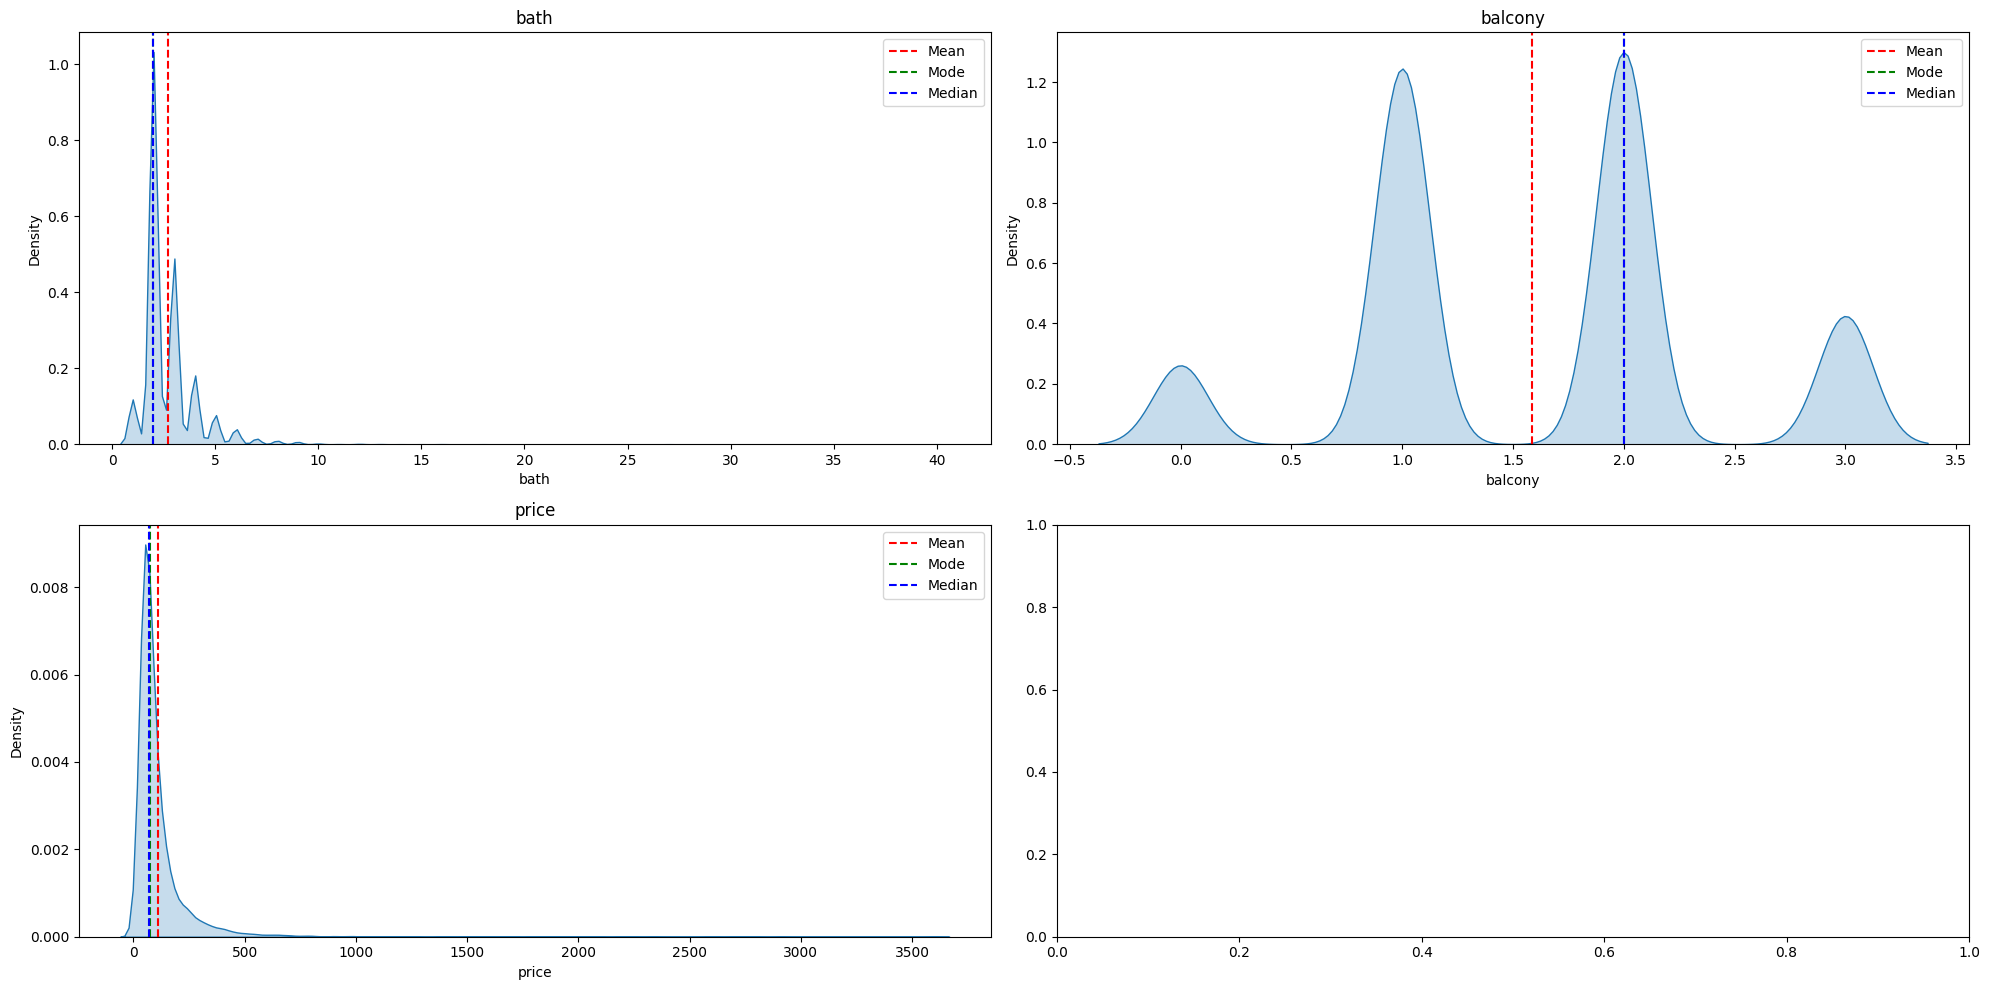

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, attr in enumerate(num_df):
    row = i // 2
    col = i % 2
    sns.kdeplot(data=num_df[attr], ax=axes[row, col], fill=True)
    axes[row, col].set_title(attr)

    mean_val = num_df[attr].mean()
    mode_val = num_df[attr].mode().iloc[0]
    median_val = num_df[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label='Mean')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label='Mode')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label='Median')

    axes[row, col].legend()

plt.tight_layout()

plt.show()

Interpretasi:
Berdasarkan hasil distribusi data, data bath dan price memiliki tipe distribusi data skewed, sedangkan data balcony memiliki tipe distribusi data bimodal.

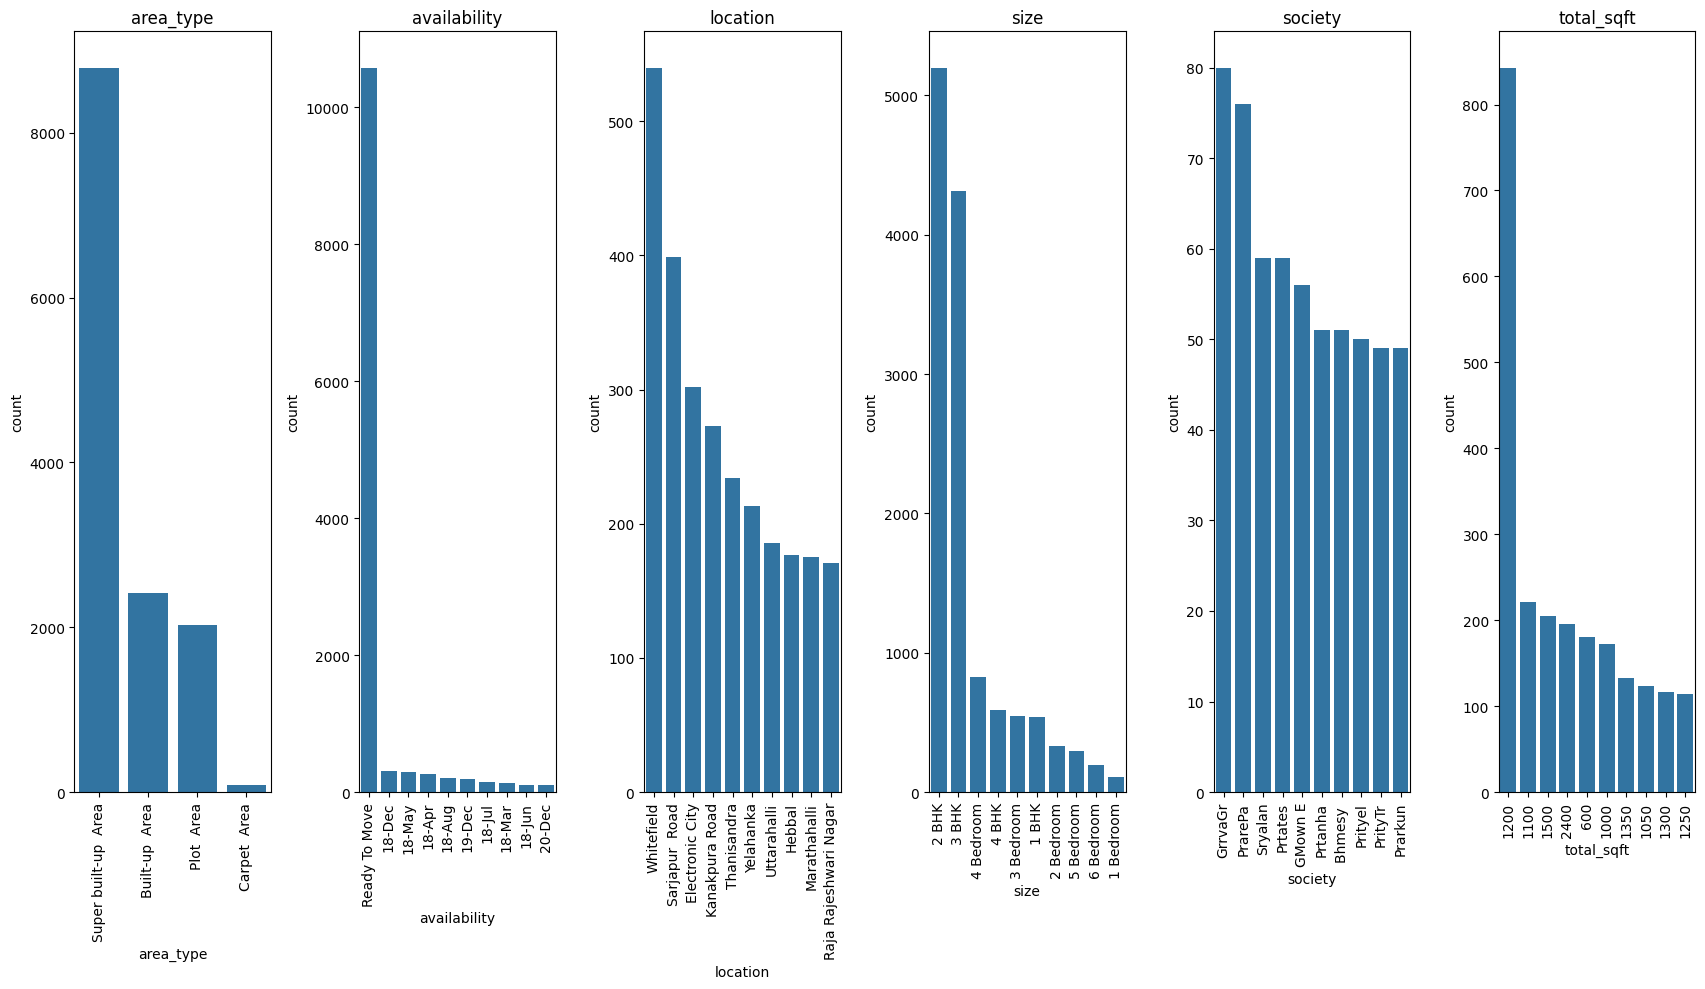

In [11]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_df.columns):
    plt.subplot(1, 7, i+1)
    top_10_values = cat_df[column].value_counts().head(10)
    sns.countplot(data=cat_df, x=column, order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

Interpretasi: Berdasarkan hasil distribusi data, seluruh data dengan tipe kategorikal memiliki distribusi data skewed.

## dython <Correlation Matrix>

menginstall dython untuk mengecek korelasi data dengan fitur kategorikal dengan price

In [12]:
pip install dython

In [13]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

categorical_features=identify_nominal_columns(df)
categorical_features

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

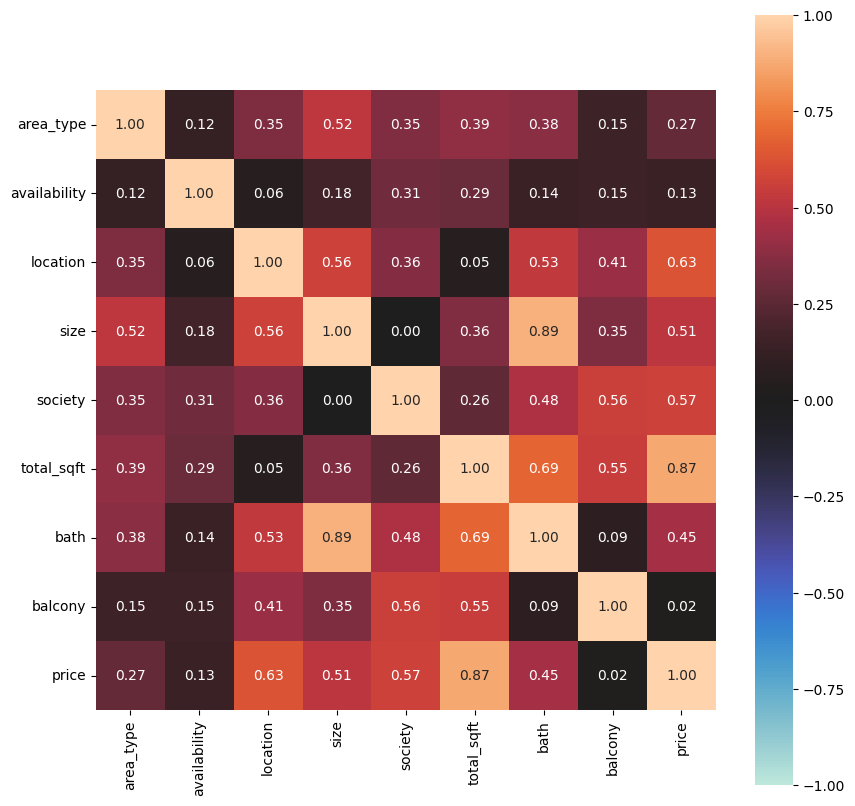

In [14]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))

# Data Preparation

## Drop feature

In [15]:
'''
fitur society saya drop juga karena tingkat null yang tinggi 41,31%, memiliki variasi yang tinggi, dan menurut saya
kurang relevan dengan harga jual rumah
'''

df = df.drop(['society', 'area_type', 'balcony', 'availability'], axis=1)
df.shape

(13320, 5)

## Missing Value

Disini imputasi missing value untuk data bath saya menggunakan median, karena distribusi datanya skewed. Untuk data kategorikal saya menggunakan imputasi dengan mode atau modus.

In [16]:
medBath = df['bath'].median()
df['bath'].fillna(medBath, inplace=True)

modeLoc = df['location'].mode()[0]
modeSize = df['size'].mode()[0]

df['location'].fillna(modeLoc, inplace=True)
df['size'].fillna(modeSize, inplace=True)

In [17]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Outlier

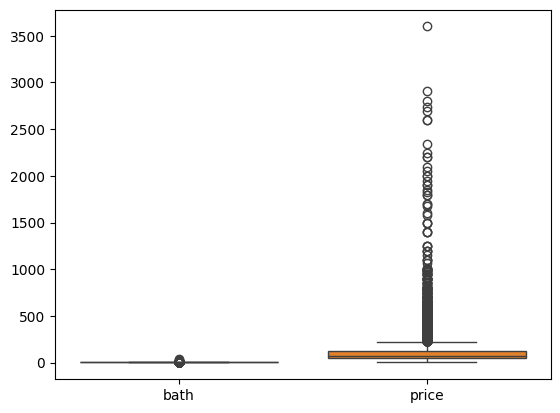

In [18]:
sns.boxplot(df)
plt.show()

Interpretasi, berdasarkan hasil boxplot, kedua data, yaitu bath dan price memiliki data outlier, sehingga saya akan menghapus nilai outlier itu dengan IQR.

In [19]:
def detect_and_remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = (df[feature] >= lower_bound) & (df[feature] <= upper_bound)

        df = df[data]

    return df

# Panggil fungsi dengan menggunakan method pipe
df = df.pipe(detect_and_remove_outliers, features=['price', 'bath'])

## inconsistent data

size memiliki 2 jenis data yaitu bhk dan bedroom, bhk menyatakan jumlah kamar tidur. sehingga bedroom akan disamakan dengan bhk, disini saya membuat fitur baru dengan nama BHK dan menghapus fitur size

In [20]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis=1)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2


mendeteksi fitur string di fitur total_sqft dengan  try-except

In [21]:
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(to_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,224.500,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2


melakukan convert tipe data fitur total_sqft menjadi float dan mengambil nilai mean untuk data dengan nilai string.

In [23]:
def convert_sqft_to_numeric(x):
    t=x.split('-')
    if len(t)==2:
        return (float(t[0])+float(t[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_numeric)

In [25]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,47.00,2
13313,Uttarahalli,1345.0,2.0,57.00,3
13314,Green Glen Layout,1715.0,3.0,112.00,3
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [26]:
top_10_locations = df['location'].value_counts().head(10)
top_10_locations

location
Whitefield               447
Sarjapur  Road           346
Electronic City          298
Kanakpura Road           267
Thanisandra              226
Yelahanka                196
Uttarahalli              179
Raja Rajeshwari Nagar    164
Marathahalli             158
Hennur Road              143
Name: count, dtype: int64

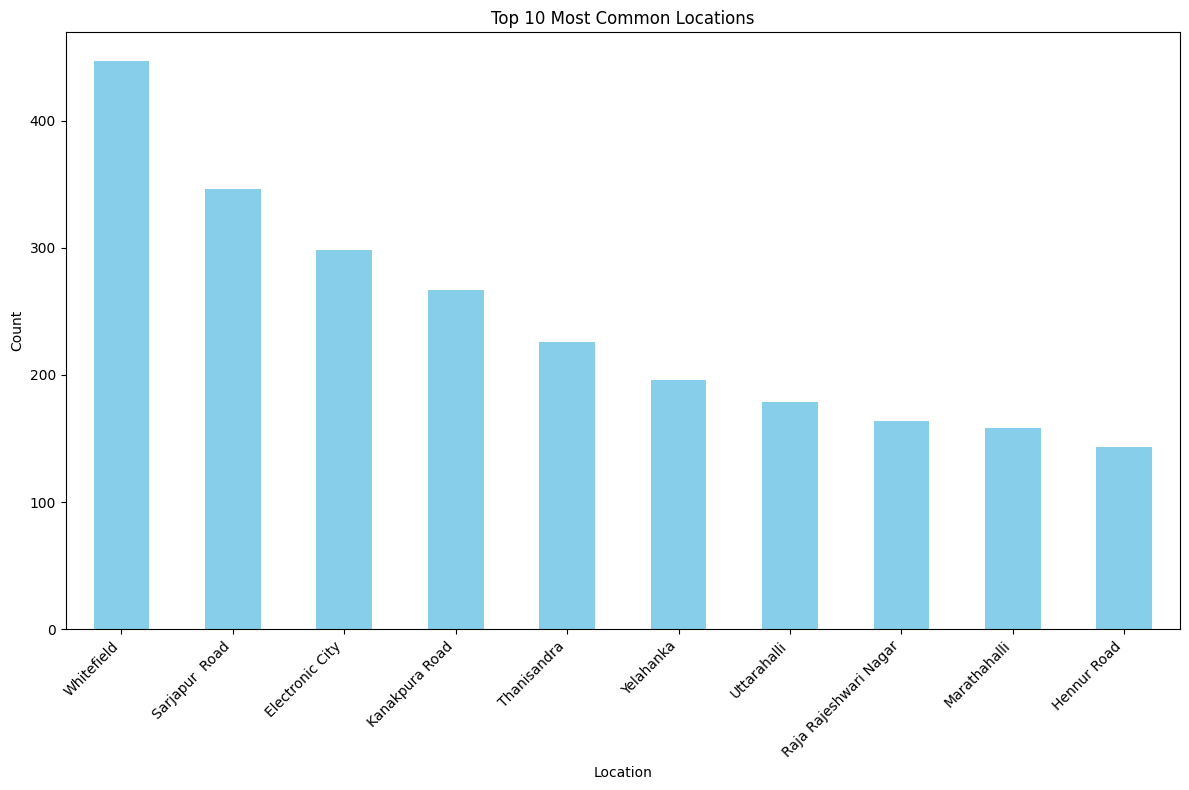

In [27]:
plt.figure(figsize=(12, 8))
top_10_locations.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Most Common Locations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretasi: Berdasarkan hasil visualisasi, 10 tempat terbanyak yang menjual rumah adalah Whitefield, Sarjapur Road, Electronic City, Kanakpura Road, Thanisandra, Yelahanka, Uttarahalli, Raja Rajeshwari Nagar, Marathahalli, dan Hennur Road.

Melakukan pengurangan jumlah data variasi data pada fitur location

source: https://www.kaggle.com/code/ahmedraafat666/house-price-data

In [28]:
df.location = df.location.str.strip()
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield              448
Sarjapur  Road          346
Electronic City         300
Kanakpura Road          267
Thanisandra             229
                       ... 
Mailasandra               1
BAGUR                     1
kanakapura main road      1
M.G Road                  1
Abshot Layout             1
Name: count, Length: 1146, dtype: int64

In [29]:
u10_loc = location_stats[location_stats<=10]
u10_loc

location
Sector 7 HSR Layout     10
Ganga Nagar             10
Nehru Nagar             10
Mico Layout             10
Basapura                10
                        ..
Mailasandra              1
BAGUR                    1
kanakapura main road     1
M.G Road                 1
Abshot Layout            1
Name: count, Length: 938, dtype: int64

In [30]:
df.location = df.location.apply(lambda x: 'other' if x in u10_loc else x)
df = df[df.location != 'other']

In [31]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,47.00,2
13313,Uttarahalli,1345.0,2.0,57.00,3
13314,Green Glen Layout,1715.0,3.0,112.00,3
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [32]:
df.to_csv("df_cleaned.csv", index=False, header=True)